In [1]:
import sympy as sm
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import timeit

In [3]:
x,y,muu = sm.symbols('x,y,mu')
xdot = y
ydot = muu*(1 - x**2)*y - x

sm.Matrix([xdot, ydot])

Matrix([
[                  y],
[mu*y*(1 - x**2) - x]])

In [4]:
Vp = sm.Matrix([xdot, ydot])
VpJ = Vp.jacobian([x,y])
VpJ

Matrix([
[            0,             1],
[-2*mu*x*y - 1, mu*(1 - x**2)]])

In [5]:
traceVpJ = sm.Trace(VpJ).rewrite(sm.Sum)
traceVpJ

mu*(1 - x**2)

In [6]:
def VP_int (t, u, mu, a): 
              
    du = np.zeros([3, 1])
    
    #variables
    x1 = u[0]
    y1 = u[1]
   
    ##Vanderpol oscillator eqns
    du[0] = a*y1
    du[1] = mu*(1 - x1**2)*y1 - x1
    du[2] = 1
    
    du = du.reshape(3,)
    return(du)

(0.01, 1)
0.03894290002062917


<IPython.core.display.Javascript object>


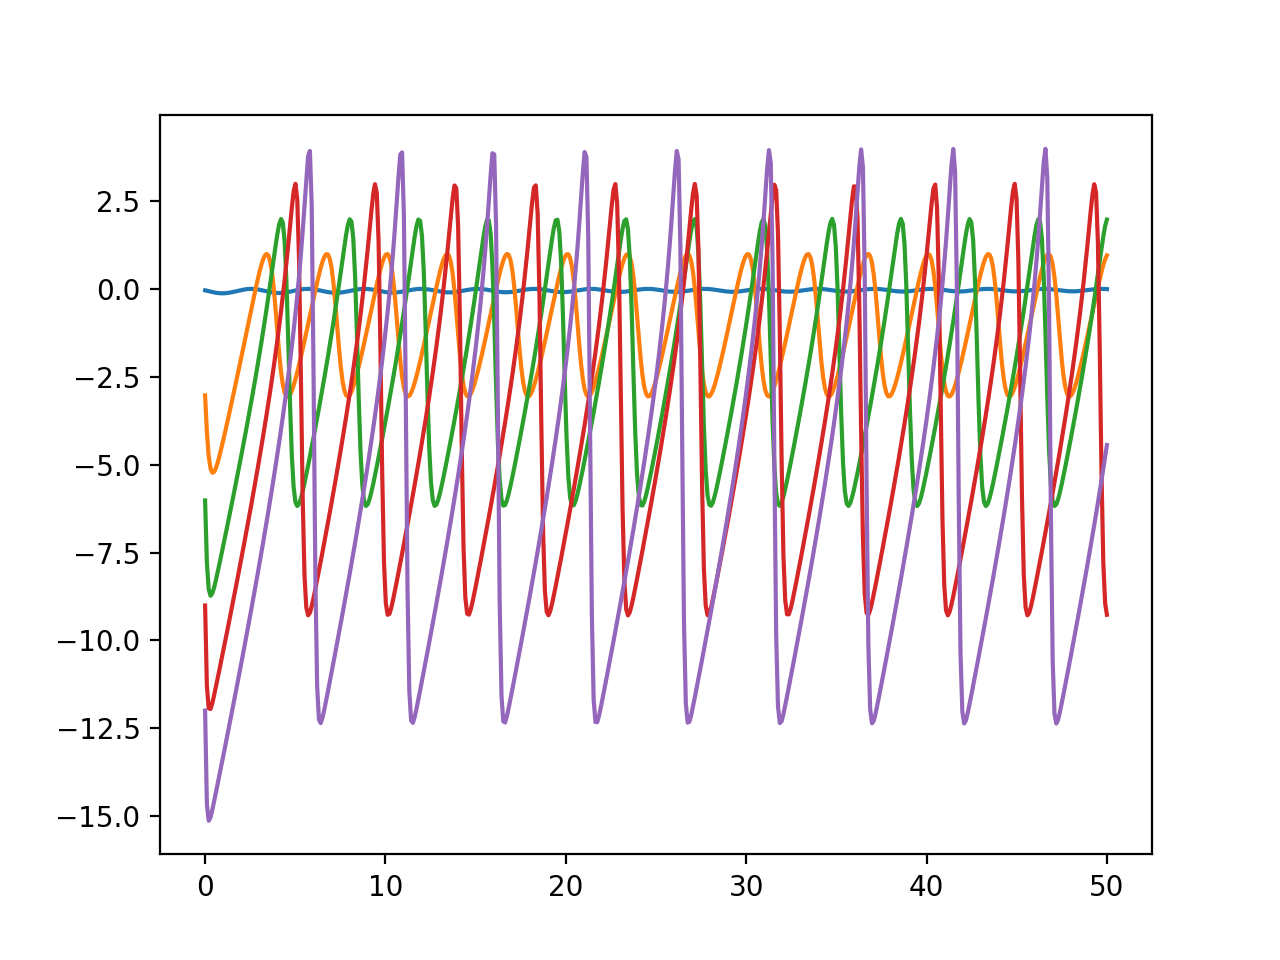

(1.0075, 1)
0.08710289999726228
(2.005, 1)
0.09293189999880269
(3.0025, 1)
0.09989859999041073
(4.0, 1)
0.09537130000535399


In [23]:
mu0 = np.linspace(0.01, 4, 5)
for i in np.arange(0, len(mu0)):
    
    mu1 = mu0[i]

    u0 = np.array([2,3,0])
    p = (mu1,1)
    print(p)

    tend = 50
    t_span = (0, tend)
    tint = np.linspace(0, tend, tend*10)

    start_time = timeit.default_timer()
    sl2 = solve_ivp (VP_int, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
    print(timeit.default_timer() - start_time)

    vps = sl2.y
    tm = vps[2]; x = vps[0]; y = vps[1];

    trcvp = mu1*(1 - x**2)

#     %matplotlib notebook
    # plt.plot(tm, x)
    # plt.plot(tm, y)

    #plt.plot(x,y)
    plt.plot(tm, trcvp)

(-0.001, 1)
0.23173720002523623


<IPython.core.display.Javascript object>


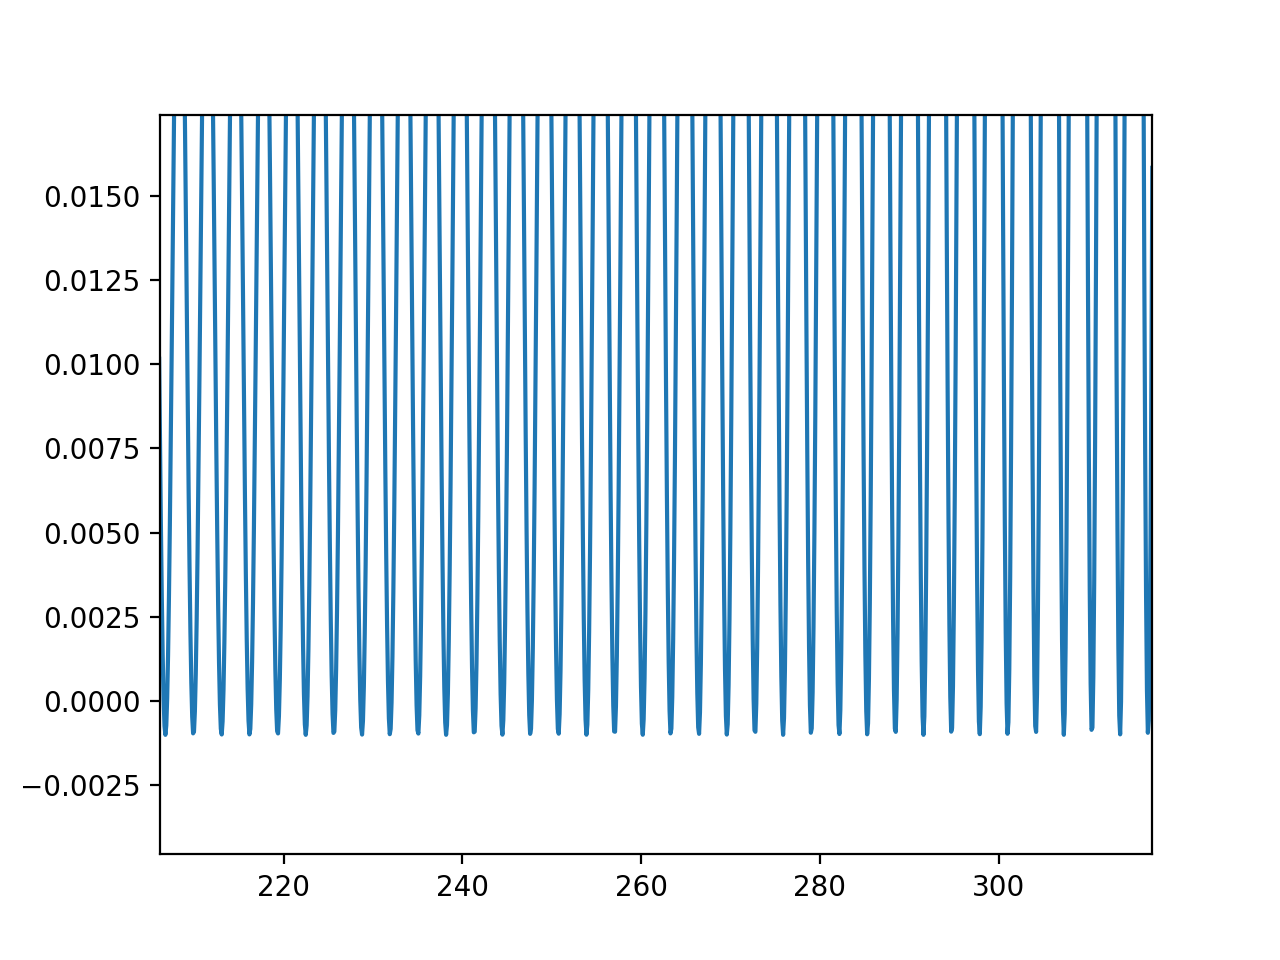

In [40]:
mu0 = np.linspace(-0.001, 4, 10)
i=0
mu1 = mu0[i]

u0 = np.array([2,3,0])
p = (mu1,1)
print(p)

tend = 350
t_span = (0, tend)
tint = np.linspace(0, tend, tend*10)

start_time = timeit.default_timer()
sl2 = solve_ivp (VP_int, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

vps = sl2.y
tm = vps[2]; x = vps[0]; y = vps[1];

trcvp = mu1*(1 - x**2)

%matplotlib notebook
# plt.plot(tm, x)
# plt.plot(tm, y)

#plt.plot(x,y)
plt.plot(tm, trcvp)

In [32]:
p

(-2.0, 1)